In [2]:
words = open('names.txt', 'r').read().split('\n')

len(words)

32033

In [3]:
min([len(word) for word in words])

2

In [4]:
max([len(word) for word in words])

15

In [5]:
bigram_freq = {}
for word in words:
    chs = ['.'] + list(word) + ['.']
    for bigram in zip(chs, chs[1:]):
        bigram_freq[bigram] = bigram_freq.get(bigram, 0) + 1

sorted(bigram_freq.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [6]:
# simple character-set encoding: indexed base.
charset = sorted(list(set(''.join(words))))

stoi = {char:i+1 for i,char in enumerate(charset)}
stoi['.'] = 0

itos = {i: char for char, i in stoi.items()}

itos
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [7]:
import torch

# rank-2 tensor, aka 2d array
N = torch.zeros(27, 27, dtype=torch.int32)

for bigram, freq in bigram_freq.items():
    ch1 = bigram[0]
    ch2 = bigram[1]
    print(f"('{ch1}','{ch2}') | ({stoi[ch1]}, {stoi[ch2]})")
    N[stoi[ch1], stoi[ch2]] = freq


('.','e') | (0, 5)
('e','m') | (5, 13)
('m','m') | (13, 13)
('m','a') | (13, 1)
('a','.') | (1, 0)
('.','o') | (0, 15)
('o','l') | (15, 12)
('l','i') | (12, 9)
('i','v') | (9, 22)
('v','i') | (22, 9)
('i','a') | (9, 1)
('.','a') | (0, 1)
('a','v') | (1, 22)
('v','a') | (22, 1)
('.','i') | (0, 9)
('i','s') | (9, 19)
('s','a') | (19, 1)
('a','b') | (1, 2)
('b','e') | (2, 5)
('e','l') | (5, 12)
('l','l') | (12, 12)
('l','a') | (12, 1)
('.','s') | (0, 19)
('s','o') | (19, 15)
('o','p') | (15, 16)
('p','h') | (16, 8)
('h','i') | (8, 9)
('.','c') | (0, 3)
('c','h') | (3, 8)
('h','a') | (8, 1)
('a','r') | (1, 18)
('r','l') | (18, 12)
('l','o') | (12, 15)
('o','t') | (15, 20)
('t','t') | (20, 20)
('t','e') | (20, 5)
('e','.') | (5, 0)
('.','m') | (0, 13)
('m','i') | (13, 9)
('a','m') | (1, 13)
('m','e') | (13, 5)
('.','h') | (0, 8)
('r','p') | (18, 16)
('p','e') | (16, 5)
('e','r') | (5, 18)
('r','.') | (18, 0)
('e','v') | (5, 22)
('v','e') | (22, 5)
('l','y') | (12, 25)
('y','n') | (25, 14)
(

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

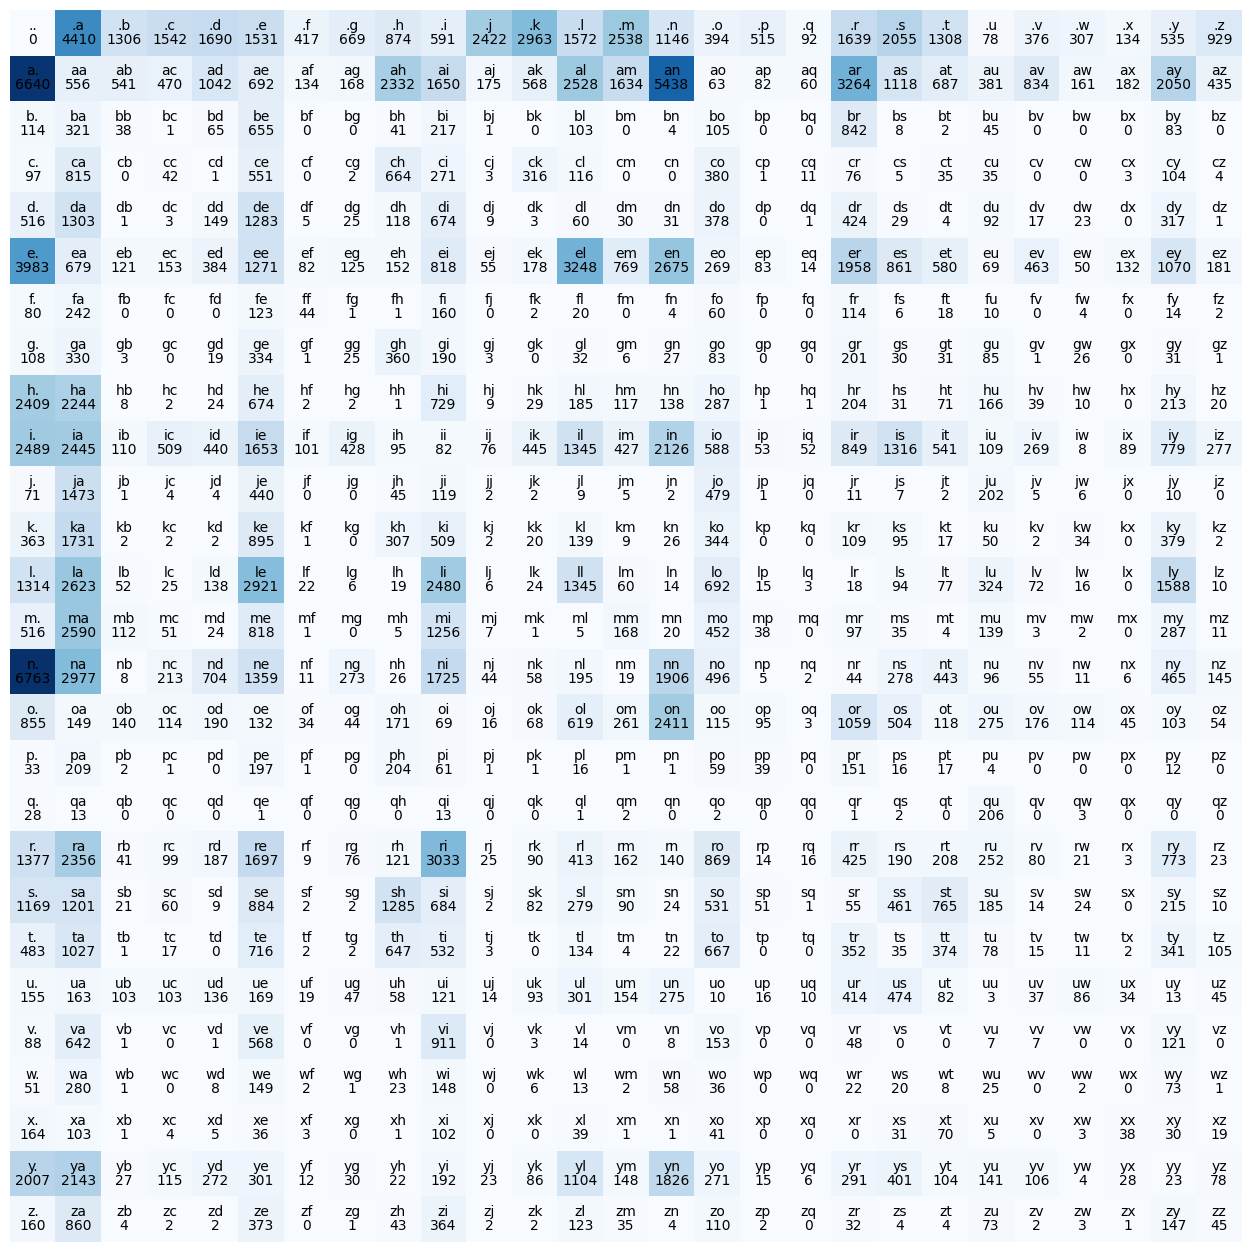

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")

for x in range(27):
    for y in range(27):
        bigram = itos[x] + itos[y]
        freq = N[x, y].item()

        # coordinate works in reverse in comparison to matrix/array
        plt.text(y, x, bigram, ha= 'center', va = 'bottom')
        plt.text(y, x, freq, ha = 'center', va = 'top')

plt.axis('off')

In [9]:
N[1]

tensor([6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
        2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
         182, 2050,  435], dtype=torch.int32)

In [11]:
p = N[0]

# normalize
p = p / p.sum()

# The variable p represents the probability distribution for a specific row in the matrix N.
# Each row corresponds to a character, and the columns represent the characters that can follow it.
print('pdist:', p)
print('verify(sum of prob = 1):', p.sum()-1 < 0.001, p.sum())



pdist: tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
verify(sum of prob = 1): tensor(True) tensor(1.)


In [12]:
# introducing generator + multinomial

# enforce deterministic characteristic on random generator
# generator is like a clock, it ticks when you call it.
g = torch.Generator().manual_seed(2147483647)

p = torch.rand(3, generator=g)

# normalize
print('pre-normalize:', p)
p = p / p.sum()
print('post-normalize:', p)


# sampling are same due to
samples = torch.multinomial(p, num_samples=20, replacement=True, generator=g)
print('samples:', samples)

pre-normalize: tensor([0.7081, 0.3542, 0.1054])
post-normalize: tensor([0.6064, 0.3033, 0.0903])
samples: tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])


In [13]:
# randomly select the first character of a word

g = torch.Generator().manual_seed(2147483647)

p = N[0].float()
p = p/p.sum()

i = torch.multinomial(p, num_samples=1 ,replacement=True, generator=g).item()
random_first_char_of_a_word = itos[i]
random_first_char_of_a_word

'c'

In [14]:
# randomly select the next character of a word

p = N[i].float()
p = p/p.sum()

i = torch.multinomial(p, num_samples=1 ,replacement=True, generator=g).item()
random_next_char_of_a_word = itos[i]
random_next_char_of_a_word

'e'

In [15]:
# randomly generate a complete word that ends with '.'

i = 0

for _ in range(20):
    name = ''
    while True:
        p = N[i].float()
        p = p/p.sum()

        i = torch.multinomial(p, num_samples=1 ,replacement=True, generator=g).item()
        ch = itos[i]
        name += ch

        if ch  == '.':
            break

    print(name)

xze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [42]:
# Optimise prob distribution calculation

num_rows = len(N)
num_cols = len(N[0])

P = torch.zeros([num_rows, num_cols], dtype=float)

for x in range(num_rows):
    P[x] = N[x] / N[x].sum()

P


tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-